# Tarea calificada 1 INAR_2022

## Cat vs. Dog Image Classification

Este ejercicio consiste en desarrollar un modelo deep learning CNN (aunque eres libre de probar otras alternativas) para una dataset que contiene imágenes de perros y gatos (exclusivamente). 

Se debe entregar este notebook (como mínimo, se pueden entregar varios notebooks en un .zip) con los siguientes puntos:

1. Carga y pre-proceso de ficheros de datos. (**YA DESARROLLADO, SOLO DEBE SER EJECUTADO**)
2. Configura un (uno al menos, puedes presentar más) modelo CNN para la clasificación perro versus gato.
3. Realiza el entrenamiento y prueba el rendimiento del modelo con el conjunto de test que hemos recopilado en clase este año.

El dataset y la primera parte de este notebook están obtenidos, con infinitas gracias, de

https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb

Por tanto se debe mencionar la siguiente licencia:

#### Copyright 2018 Google LLC.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License.

You may obtain a copy of the License at

 https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and limitations under the License.


## 1. Carga y Pre-Proceso de Datos

Descarga por favor el .zip 

cats_and_dogs_filtered.zip

del Blackboard de la tarea en la misma ruta (carpeta) de este notebook y ejecuta los siguientes pasos.

(o si usas Google Colab lo tienes en la dirección anterior)

Mantengo la nota original del origen del dataset.


**NOTE:** The 2,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import zipfile

# local_zip = 'cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('')
# zip_ref.close()

# local_zip2 = 'test.zip'
# zip_ref = zipfile.ZipFile(local_zip2, 'r')
# zip_ref.extractall('')
# zip_ref.close()

The contents of the .zip are extracted to the base directory `cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets (see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/check-your-intuition) for a refresher on training, validation, and test sets), which in turn each contain `cats` and `dogs` subdirectories. 

NOTA: Además, en el mismo directorio donde se descomprime el cats_and_dogs_filtered descomprime el test.zip en un directorio test. 

Si todo está bien nombrado y "colgando" de la misma ruta, te saldrán los siguientes tamaños de conjuntos train     /validation / test (un poco más adelante)

- total training cat images: 1000
- total training dog images: 1000
- total validation cat images: 500
- total validation dog images: 500
- total test cat images: 155
- total test dog images: 158



In [3]:
import os
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

Now, let's see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.467.jpg', 'cat.904.jpg', 'cat.44.jpg', 'cat.295.jpg', 'cat.392.jpg', 'cat.878.jpg', 'cat.495.jpg', 'cat.522.jpg', 'cat.95.jpg', 'cat.929.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 155
total test dog images: 158


For both cats and dogs, we have 1,000 training images and 500 test images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

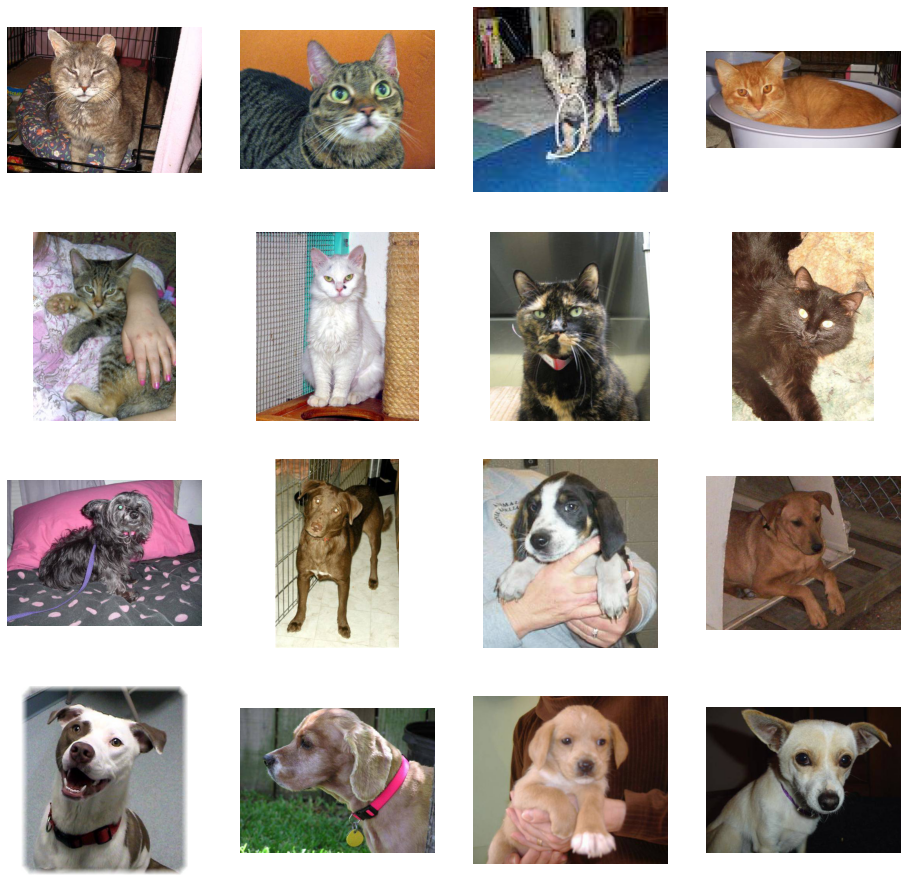

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = tf.keras.utils.image_dataset_from_directory(
    'cats_and_dogs_filtered/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False)


# Flow training images in batches of 20 using train_datagen generator
validation_generator = tf.keras.utils.image_dataset_from_directory(
    'cats_and_dogs_filtered/validation',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False)

# Flow training images in batches of 20 using train_datagen generator
test_generator = tf.keras.utils.image_dataset_from_directory(
    'cats_and_dogs_filtered/test',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False)



Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 313 files belonging to 2 classes.


# 2. Modelo CNN (con summary + compile)

In [9]:
from keras import models
from keras import layers

network = models.Sequential()

#Primera capa convolucional, 32 neuronas, filtro 3x3
network.add(layers.Conv2D(32, (3, 3), 
                          activation='relu', 
                          input_shape=(256, 256, 3)))

#capa maxpool
network.add(layers.MaxPool2D((2,2)))

#Segunda capa convolucional, 64 neuronas, filtro 3x3
network.add(layers.Conv2D(64, (3, 3), 
                          activation='relu'))

#capa maxpool
network.add(layers.MaxPool2D((2,2)))

#capa de salida
network.add(layers.Flatten()) 
network.add(layers.Dense(256, activation = 'relu'))
network.add(layers.Dense(2, activation='softmax'))


In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 256)               6

# 3. Entrenamiento del modelo (.fit) y rendimiento del modelo (accuracy) con conjunto test

In [12]:
network.fit(train_generator,
            epochs = 15, 
            validation_data = validation_generator) #validation data se tiene en cuenta otros criterios a la hora de evaluar el modelo
# batch_size = 32

Epoch 1/15
63/63 [==============================] - 15s 181ms/step - loss: 201.5021 - accuracy: 0.5680 - val_loss: 1.2601 - val_accuracy: 0.5650
Epoch 2/15
63/63 [==============================] - 9s 135ms/step - loss: 6.1673 - accuracy: 0.7455 - val_loss: 1.2783 - val_accuracy: 0.5860
Epoch 3/15
63/63 [==============================] - 8s 121ms/step - loss: 1.0460 - accuracy: 0.8525 - val_loss: 2.6900 - val_accuracy: 0.6130
Epoch 4/15
63/63 [==============================] - 8s 120ms/step - loss: 16.6126 - accuracy: 0.8420 - val_loss: 5.4901 - val_accuracy: 0.5930
Epoch 5/15
63/63 [==============================] - 8s 121ms/step - loss: 6.5288 - accuracy: 0.9105 - val_loss: 4.8841 - val_accuracy: 0.6340
Epoch 6/15
63/63 [==============================] - 8s 121ms/step - loss: 12.0730 - accuracy: 0.8565 - val_loss: 4.2038 - val_accuracy: 0.6300
Epoch 7/15
63/63 [==============================] - 8s 122ms/step - loss: 4.2947 - accuracy: 0.9160 - val_loss: 3.5452 - val_accuracy: 0.6240
E

In [13]:
test_loss, test_acc = network.evaluate(train_generator)
print('test_acc:', test_acc)

63/63 [==============================] - 4s 54ms/step - loss: 0.6922 - accuracy: 0.5010
test_acc: 0.5009999871253967


# 4. Trabajo adicional (Neural Transfer, Fine Tuning, visualización de capas intermedias ...)

In [18]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (256, 256, 3), 
                                include_top = False, 
                                weights = 'imagenet')


pre_trained_model.summary()

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [19]:


from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# para reducir el tamaño de los mapas de activación que se van obteniendo, se intercalan bloques 
# maxpooling entre los convolucionales, reduciendo a la mitad el tamaño de estos mapas de activación. 

modelFE = Sequential()
modelFE.add(pre_trained_model)
modelFE.add(Flatten())
modelFE.add(Dense(256, activation='relu'))
modelFE.add(Dense(1, activation='sigmoid'))



modelFE.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8388864   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,103,809
Trainable params: 8,389,121
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )



train_generator = train_datagen.flow_from_directory('cats_and_dogs_filtered/train',
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(256, 256))     

validation_generator =  validation_datagen.flow_from_directory('cats_and_dogs_filtered/validation',
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size=(256, 256))     

test_generator =  test_datagen.flow_from_directory('cats_and_dogs_filtered/test',
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size=(256, 256))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 313 images belonging to 2 classes.


In [21]:
from tensorflow.keras.optimizers import RMSprop

modelFE.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# network.compile(optimizer='rmsprop',
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy'])

batch_size = 32   #tamanio del subconjunto
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFE = modelFE.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 50,
            validation_steps = validation_steps,
            verbose = 2)

Epoch 1/50
62/62 - 29s - loss: 0.7254 - acc: 0.6508 - val_loss: 0.5217 - val_acc: 0.7242 - 29s/epoch - 475ms/step
Epoch 2/50
62/62 - 26s - loss: 0.4895 - acc: 0.7637 - val_loss: 0.2774 - val_acc: 0.8839 - 26s/epoch - 418ms/step
Epoch 3/50
62/62 - 26s - loss: 0.4436 - acc: 0.7944 - val_loss: 0.3787 - val_acc: 0.7968 - 26s/epoch - 419ms/step
Epoch 4/50
62/62 - 26s - loss: 0.3970 - acc: 0.8274 - val_loss: 0.2038 - val_acc: 0.9210 - 26s/epoch - 421ms/step
Epoch 5/50
62/62 - 26s - loss: 0.3830 - acc: 0.8250 - val_loss: 0.2130 - val_acc: 0.9145 - 26s/epoch - 427ms/step
Epoch 6/50
62/62 - 26s - loss: 0.3525 - acc: 0.8452 - val_loss: 0.2192 - val_acc: 0.8952 - 26s/epoch - 421ms/step
Epoch 7/50
62/62 - 26s - loss: 0.3595 - acc: 0.8411 - val_loss: 0.1868 - val_acc: 0.9290 - 26s/epoch - 419ms/step
Epoch 8/50
62/62 - 26s - loss: 0.3548 - acc: 0.8516 - val_loss: 0.2075 - val_acc: 0.9177 - 26s/epoch - 420ms/step
Epoch 9/50
62/62 - 26s - loss: 0.3144 - acc: 0.8573 - val_loss: 0.3963 - val_acc: 0.8129

In [22]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

16/16 [==============================] - 30s 2s/step - loss: 0.7345 - acc: 0.7348
Test Accuracy: 0.7348242998123169
